<a href="https://colab.research.google.com/github/arnisafazla/CS490/blob/main/CS_490_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/CS490/CS490-Senior-Research-Project

/content/drive/MyDrive/CS490/CS490-Senior-Research-Project


##Experiments Rotation Representations and Testing

In [149]:
eul = np.array(dataset.X[0:100])

In [377]:
rots = Tools.euler_to_rots(eul) # 9 s

In [379]:
rots = euler_to_rots(eul) # 9 s

(100, 200, 23, 3, 3)
(100, 200, 23, 3, 3)


In [364]:
100*200*69

1380000

In [374]:
euler = eul.copy()
shape = (euler.shape[0], euler.shape[1], int(euler.shape[2]/3), 3, 3)
eul2 = euler.reshape(-1, 3)

rots = _from_euler(eul2).reshape(shape)

In [351]:
eul2.shape

(460000, 3)

In [359]:
shape = (eul.shape[0], eul.shape[1], eul.shape[2], 3, 3)

In [369]:
euler = eul
shape = (euler.shape[0], euler.shape[1], int(euler.shape[2]/3), 3, 3)
eul2 = euler.reshape(-1, 3)

rots = _from_euler(eul2)
print(shape)
print(rots.shape)

(100, 200, 23.0, 3, 3)
(460000, 3, 3)


In [368]:
eul.shape

(100, 200, 69)

In [371]:
100*200*69 / 460000


3.0

In [378]:
from pymo.rotation_tools import Rotation
def euler_to_rots(euler):
    shape = (euler.shape[0], euler.shape[1], int(euler.shape[2]/3), 3, 3)
    eul2 = euler.reshape(-1, 3)
    
    rots = _from_euler(eul2).reshape(shape)
    print(shape)
    print(rots.shape)
    return rots

In [347]:
def _from_euler(y):
  ca = np.cos(y[:,0] * np.pi / 180)
  cb = np.cos(y[:,1] * np.pi / 180)
  cg = np.cos(y[:,2] * np.pi / 180)
  sa = np.sin(y[:,0] * np.pi / 180)
  sb = np.sin(y[:,1] * np.pi / 180)
  return np.stack((np.stack((cg*cb+sa*sb*sg, sg*ca, -cg*sb+sg*sa*cb), axis=1),
                        np.stack((-sg*cb+cg*sa*sb, cg*ca, sg*sb+cg*sa*cb), axis=1),
                        np.stack((ca*sb, -sa, ca*cb), axis=1)), axis=1)

In [282]:
a = np.array([1,2])
b = np.array([3,4])
c = np.array([5,6])

In [310]:
ca

array([0.96536343, 0.99994937, 0.99999876, 0.99999663, 0.99995665])

In [311]:
cb

array([0.87634658, 0.94836735, 0.99932755, 0.99814396, 0.96088643])

In [325]:
d = np.array([ca, cb, cg]).T

In [326]:
d

array([[0.96536343, 0.87634658, 0.99943998],
       [0.99994937, 0.94836735, 0.99957905],
       [0.99999876, 0.99932755, 0.99999525],
       [0.99999663, 0.99814396, 0.99998446],
       [0.99995665, 0.96088643, 0.99969047]])

In [323]:
c = np.arange(15).reshape(5,3)

In [333]:
np.stack((d,c), axis=2)

array([[[ 0.96536343,  0.        ],
        [ 0.87634658,  1.        ],
        [ 0.99943998,  2.        ]],

       [[ 0.99994937,  3.        ],
        [ 0.94836735,  4.        ],
        [ 0.99957905,  5.        ]],

       [[ 0.99999876,  6.        ],
        [ 0.99932755,  7.        ],
        [ 0.99999525,  8.        ]],

       [[ 0.99999663,  9.        ],
        [ 0.99814396, 10.        ],
        [ 0.99998446, 11.        ]],

       [[ 0.99995665, 12.        ],
        [ 0.96088643, 13.        ],
        [ 0.99969047, 14.        ]]])

In [324]:
c

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [255]:
_from_euler(y)

array([[[ 8.71650420e-01, -3.23034062e-02,  4.89062404e-01],
        [ 1.54929188e-01,  9.64822800e-01, -2.12400357e-01],
        [-4.64997303e-01,  2.60908902e-01,  8.45992939e-01]],

       [[ 9.47875534e-01,  2.90108898e-02, -3.17317413e-01],
        [-3.07047794e-02,  9.99528440e-01, -3.37516142e-04],
        [ 3.17157987e-01,  1.00630845e-02,  9.48319327e-01]]])

In [354]:
y = eul2
ca = np.cos(y[:,0] * np.pi / 180)
cb = np.cos(y[:,1] * np.pi / 180)
cg = np.cos(y[:,2] * np.pi / 180)
sa = np.sin(y[:,0] * np.pi / 180)
sb = np.sin(y[:,1] * np.pi / 180)
sg = np.sin(y[:,2] * np.pi / 180)        

############################ inner product rotation matrix in order defined at BVH file #########################:
rots = np.stack((np.stack((cg*cb+sa*sb*sg, sg*ca, -cg*sb+sg*sa*cb), axis=1),
                        np.stack((-sg*cb+cg*sa*sb, cg*ca, sg*sb+cg*sa*cb), axis=1),
                        np.stack((ca*sb, -sa, ca*cb), axis=1)), axis=1)

In [356]:
rots.shape

(460000, 3, 3)

In [306]:
a = np.arange(45).reshape(3,3,5)

In [307]:
a

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44]]])

In [308]:
a.reshape(5,3,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]]])

In [245]:
y = eul2[:2]

In [250]:
_from_euler(y[0])

array([[ 0.87165042, -0.03230341,  0.4890624 ],
       [ 0.15492919,  0.9648228 , -0.21240036],
       [-0.4649973 ,  0.2609089 ,  0.84599294]])

In [248]:
def deg2rad(x):
  return x/180*math.pi

def _from_euler(y):
  ca = np.cos(y[0] * np.pi / 180)
  cb = np.cos(y[1] * np.pi / 180)
  cg = np.cos(y[2] * np.pi / 180)
  sa = np.sin(y[0] * np.pi / 180)
  sb = np.sin(y[1] * np.pi / 180)
  sg = np.sin(y[2] * np.pi / 180)        


  ############################ inner product rotation matrix in order defined at BVH file #########################:
  return np.array([[cg*cb+sa*sb*sg, sg*ca, -cg*sb+sg*sa*cb],
                          [-sg*cb+cg*sa*sb, cg*ca, sg*sb+cg*sa*cb],
                          [ca*sb, -sa, ca*cb]])

In [ ]:
y[0] * np.pi / 180

-0.5025719912480672

In [ ]:
deg2rad(y[0])

-0.5025719912480673

In [98]:
rotmat

array([[ 0.96061741, -0.02932469,  0.27632273],
       [ 0.15790791,  0.87585581, -0.45600625],
       [-0.22864662,  0.48168109,  0.84599294]])

In [89]:
Rotation(y, 'euler', rotation_order='YXZ', from_deg=True).rotmat

array([[ 0.96061741, -0.02932469,  0.27632273],
       [ 0.15790791,  0.87585581, -0.45600625],
       [-0.22864662,  0.48168109,  0.84599294]])

In [104]:
np.array([[cg*cb+sa*sb*sg, sg*ca, -cg*sb+sg*sa*cb],
                         [-sg*cb+cg*sa*sb, cg*ca, sg*sb+cg*sa*cb],
                         [ca*sb, -sa, ca*cb]])

array([[ 0.96061741, -0.02932469,  0.27632273],
       [ 0.15790791,  0.87585581, -0.45600625],
       [-0.22864662,  0.48168109,  0.84599294]])

In [102]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
rots_dict = Tools.rots_to_dict(rots, dataset)

In [ ]:
transformed = dataset.rots_to_pos(rots)

In [ ]:
transformed = dataset.eul_to_pos(eul)

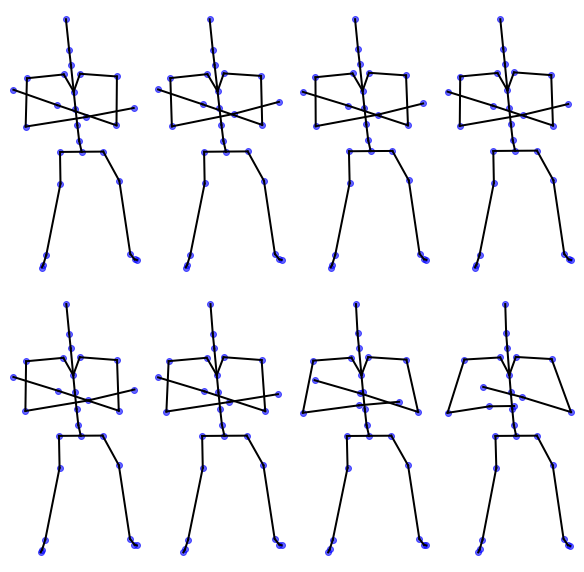

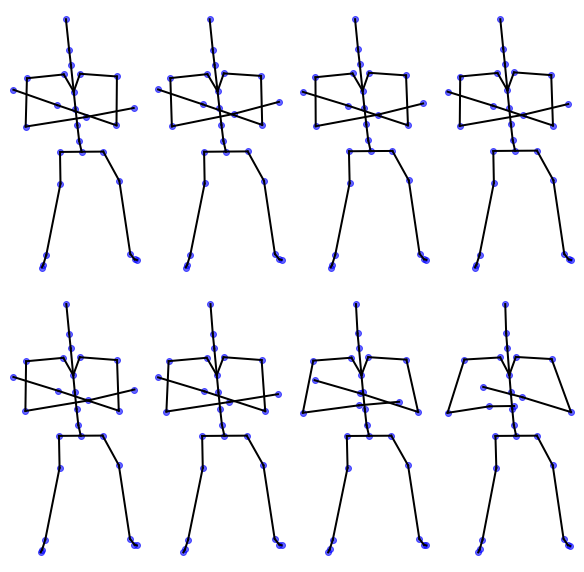

In [ ]:
dataset.stickfigure(transformed[0], step=20, cols=4)

In [ ]:
ort6d = Tools.rots_to_ort6d(rots)

In [ ]:
rots_converted = Tools.ort6d_to_rots(ort6d, 1, 200, 23)

In [ ]:
# convert to rotation matrices
eul = np.array([dataset.X[0]])
def euler_to_rots(euler, rotation_order='YXZ'):
  eul2 = euler.reshape(euler.shape[0], euler.shape[1], -1, 3)
  eul3 = eul2.copy()
  eul3[:,:,:,0] = eul2[:,:,:,1]
  eul3[:,:,:,1] = eul2[:,:,:,0]
  rots = np.array([[[Rotation([joint[0], joint[1], joint[2]], 'euler', rotation_order, from_deg=True).rotmat for joint in frame] for frame in track] for track in eul3])
  return rots

In [ ]:
# given rotation matrices (shape: tracks x frames x joints x 3 x 3)
# return ort6d representation (shape: tracks x frames x joints x 6)
def rots_to_ort6d(rots):
  return tf.reshape(tf_matrix_to_rotation6d(tf.convert_to_tensor(rots)), [rots.shape[0],rots.shape[1],rots.shape[2],6])

array([[-0.9944712 , -0.01168593, -0.10435741],
       [-0.09036356,  0.6014758 ,  0.793764  ],
       [ 0.05349258,  0.79880554, -0.59920635]])

In [ ]:
def ort6d_to_rots(ort6d, tracks, frames, joints):
  return np.array(tf.reshape(converted, [tracks,frames,joints,3,3]))

In [ ]:
ort6d = tf.reshape(tf_matrix_to_rotation6d(tf.convert_to_tensor(rots)), [rots.shape[0],rots.shape[1],rots.shape[2],6])

In [ ]:
converted = tf_rotation6d_to_matrix(ort6d)

In [ ]:
def draw_stickfigure3d(mocap_track, frame, data=None, joints=None, draw_names=False, ax=None, figsize=(8,8)):
    from mpl_toolkits.mplot3d import Axes3D
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d') 
    
    if joints is None:
        joints_to_draw = mocap_track.skeleton.keys()
    else:
        joints_to_draw = joints
    
    if data is None:
        df = mocap_track.values
    else:
        df = data
        
    for joint in joints_to_draw:
        parent_x = df['%s_Xposition'%joint][frame]
        parent_y = df['%s_Zposition'%joint][frame]
        parent_z = df['%s_Yposition'%joint][frame]
        # ^ In mocaps, Y is the up-right axis 

        ax.scatter(xs=parent_x, 
                   ys=parent_y,  
                   zs=parent_z,  
                   alpha=0.6, c='b', marker='o')

        
        children_to_draw = [c for c in mocap_track.skeleton[joint]['children'] if c in joints_to_draw]
        
        for c in children_to_draw:
            child_x = df['%s_Xposition'%c][frame]
            child_y = df['%s_Zposition'%c][frame]
            child_z = df['%s_Yposition'%c][frame]
            # ^ In mocaps, Y is the up-right axis

            ax.plot([parent_x, child_x], [parent_y, child_y], [parent_z, child_z], 'k-', lw=2, c='black')
            
        if draw_names:
            ax.text(x=parent_x + 0.1, 
                    y=parent_y + 0.1,
                    z=parent_z + 0.1,
                    s=joint,
                    color='rgba(0,0,0,0.9)')

    return ax


def sketch_move(mocap_track, data=None, ax=None, figsize=(16,8)):
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
    
    if data is None:
        data = mocap_track.values

    for frame in range(0, data.shape[0], 4):
#         draw_stickfigure(mocap_track, f, data=data, ax=ax)
        
        for joint in mocap_track.skeleton.keys():
            children_to_draw = [c for c in mocap_track.skeleton[joint]['children']]
            
            parent_x = data['%s_Xposition'%joint][frame]
            parent_y = data['%s_Yposition'%joint][frame]
            
            frame_alpha = frame/data.shape[0]
            
            for c in children_to_draw:
                child_x = data['%s_Xposition'%c][frame]
                child_y = data['%s_Yposition'%c][frame]
                
                ax.plot([parent_x, child_x], [parent_y, child_y], '-', lw=1, color='gray', alpha=frame_alpha)



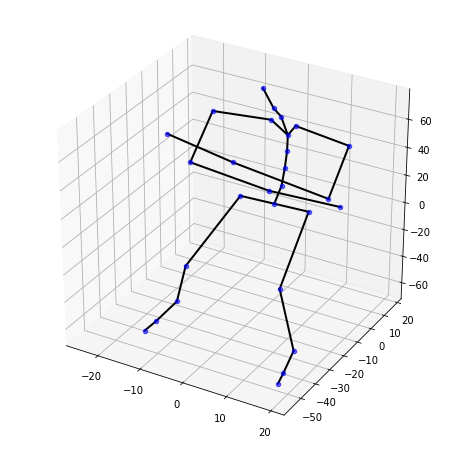

In [ ]:
draw_stickfigure3d(new_track, 0)

##Experiments Mocap Player

In [ ]:
nb_play_mocap(transformed, 'pos')

In [ ]:
import IPython
def nb_play_mocap(mocap, mf, meta=None, frame_time=1/30, scale=1, camera_z=500, base_url=None):
    data_template = 'var dataBuffer = `$$DATA$$`;'
    data_template += 'var metadata = $$META$$;'
    data_template += 'start(dataBuffer, metadata, $$CZ$$, $$SCALE$$, $$FRAMETIME$$);'
    dir_path = '/content/drive/MyDrive/CS490/CS490-Senior-Research-Project/PyMO/pymo' # os.path.dirname(os.path.realpath(__file__))


    if base_url is None:
        base_url = os.path.join(dir_path, 'mocapplayer/playBuffer.html')
    
    # print(dir_path)

    if mf == 'bvh':
        pass
    elif mf == 'pos':
        cols = list(mocap.values.columns)
        for c in cols:
            if 'rotation' in c:
                cols.remove(c)
        
        data_csv = mocap.values.to_csv(index=False, columns=cols)

        if meta is not None:
            lines = [','.join(item) for item in meta.astype('str')]
            meta_csv = '[' + ','.join('[%s]'%l for l in lines) +']'            
        else:
            meta_csv = '[]'
        
        data_assigned = data_template.replace('$$DATA$$', data_csv)
        data_assigned = data_assigned.replace('$$META$$', meta_csv)
        data_assigned = data_assigned.replace('$$CZ$$', str(camera_z))
        data_assigned = data_assigned.replace('$$SCALE$$', str(scale))
        data_assigned = data_assigned.replace('$$FRAMETIME$$', str(frame_time))

    else:
        return
    
    

    with open(os.path.join(dir_path, 'mocapplayer/data.js'), 'w') as oFile:
        oFile.write(data_assigned)

    url = '%s?&cz=200&order=xzyi&frame_time=%f&scale=%f'%(base_url, frame_time, scale)
    iframe = '<iframe frameborder="0" src=' + url + ' width="100%" height=500></iframe>'
    link = '<a href=%s target="_blank">New Window</a>'%url
    return IPython.display.HTML(iframe+link)

In [ ]:
import IPython
IPython.display.HTML(filename='/content/drive/MyDrive/CS490/CS490-Senior-Research-Project/PyMO/pymo/mocapplayer/test.html')

In [ ]:
! touch /content/drive/MyDrive/CS490/CS490-Senior-Research-Project/PyMO/pymo/mocapplayer/test2.js

In [ ]:

import IPython
from google.colab import output

IPython.display.HTML(filename='/content/drive/MyDrive/CS490/CS490-Senior-Research-Project/PyMO/pymo/mocapplayer/playBuffer.html')


In [ ]:
! cp /content/drive/MyDrive/CS490/CS490-Senior-Research-Project/PyMO/pymo/mocapplayer/data.js /usr/local/share/jupyter/nbextensions/google.colab/data.js



##Version Control

In [ ]:
! git pull

Already up to date.


In [ ]:
!git config --global user.email "arnisa.fazla@ug.bilkent.edu.tr"
!git config --global user.name "arnisafazla"
! git add .

In [ ]:
! git commit -m 'mocap visualization directly from matrix representation, conversion between 6d and matrix repr.esenations are done. nb_mocap_player not working'

[main 0e88984] mocap visualization directly from matrix representation, conversion between 6d and matrix repr.esenations are done. nb_mocap_player not working
 7 files changed, 203 insertions(+), 93 deletions(-)
 delete mode 100644 PyMO/LICENSE
 create mode 100644 PyMO/pymo/mocapplayer/test.html
 create mode 100644 PyMO/pymo/mocapplayer/test2.js
 rewrite setup.ipynb (91%)


In [ ]:
! git add .

In [ ]:
! git check-ignore -v __pycache__/

.gitignore:1:__pycache__	__pycache__/


In [ ]:
! echo 'models/__pycache__' >> .gitignore

In [ ]:
! git add models/
! git add tools.py

In [ ]:
! git push origin main

Counting objects: 11, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 82.19 KiB | 2.57 MiB/s, done.
Total 11 (delta 7), reused 0 (delta 0)
remote: Resolving deltas: 100% (7/7), completed with 7 local objects.
To https://github.com/arnisafazla/CS490-Senior-Research-Project.git
   0c713f8..0e88984  main -> main


##Setup Dataset

In [3]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model

# path to the cloned repo
main_dir = '/content/drive/MyDrive/CS490/CS490-Senior-Research-Project'  
# path to the dataset folder
dataset_dir = '/content/drive/MyDrive/CS490/dataset'
%cd {main_dir}
sys.path.insert(0,main_dir)
sys.path.insert(0,'/content/drive/MyDrive/CS490')
from dataset import Dataset
from tools import Tools, Metrics
from models.critic_models.LSTM_critic import define_critic
from models.critic_models.projection_critic import define_projection_critic
from models.generator_models.norm_generator import define_norm_generator
from models.generator_models.LSTM_generator import define_generator
from models.Base_WGAN import Base_WGAN

/content/drive/MyDrive/CS490/CS490-Senior-Research-Project


In [9]:
data = {}
data['X'] = dataset_2.X
data['X_val'] = dataset_2.X_val
data['Y_ord'] = dataset_2.Y_ord
data['Y_ord_val'] = dataset_2.Y_ord_val
data['Y_vec'] = dataset_2.Y_vec
data['Y_vec_val'] = dataset_2.Y_vec_val
data['data'] = dataset_2.data
data['feature_names'] = dataset_2.feature_names
data['n_features'] = dataset_2.n_features

In [10]:
dataset = Dataset(["anger", "joy", "fear", "neutral", "sadness", "pride"], path=dataset_dir, step_size=10, frames=200, validation=0.1, data = data, representation='eul')
# dataset = Dataset(["anger", "joy", "fear", "neutral", "sadness", "pride"], path=dataset_dir, step_size=10, frames=200, validation=0.2, representation='eul')
# dataset = Dataset(["sadness"], path=dataset_dir, step_size=10, frames=200, validation=0.1)

In [8]:
import copy
dataset_2 = copy.deepcopy(dataset)

In [12]:
Dataset.balance(dataset)

No. of samples in each class will be:  941


##Experiments Model

In [ ]:
! rm -rf /content/drive/MyDrive/CS490/models/models_smoothened_data/one_class_2022.02.27-15:51:28

In [13]:
# save this as a separate file
config = {       # change hyperparams here
        'latent_dim' : 400,
        'in_shape' : (dataset.frames, dataset.n_features*2),  # because sin and cos values for each value
        'n_classes' : dataset.emotions.shape[0],
        'init_std' : 0.01,
        'epochs' : 20,
        'batch_size' : 256,
        'n_critic' : 1,
        'dataset_balanced' : True,
        'critic_batch_norm' : False,
        'critic_instance_norm' : False,
        'critic_layer_norm' : True,
        'critic_weight_norm' : False,
        'critic_cond_layer_norm' : False,
        'generator_batch_norm' : False,
        'generator_layer_norm' : False,
        'generator_layer_norm_plus' : True,
        'critic_dropout' : 0,
        'gp_weight' : 10.0,      # for the gradient penalty used in critic
        'note' : 'only critic',
        'validation' : True,
        'only_critic' : True,
        'representation' : '6d'
      }

In [ ]:
! mkdir /content/drive/MyDrive/CS490/logs/

In [14]:
critic = define_projection_critic(config)
# plot_model(critic, show_shapes=True, show_layer_names=True)

In [ ]:
generator = define_norm_generator(config)

In [15]:
outputs_path = '/content/drive/MyDrive/CS490/models'
# the saved models, outputs, and config files will go to this folder
gan = Base_WGAN(config, dataset, outputs_path, '6d_repr', critic, None)

In [16]:
generator_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
critic_optimizer = keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5, beta_2=0.9
)
# Define the loss functions for the critic,
# which should be (fake_loss - real_loss).
# We will add the gradient penalty later to this loss function.
def critic_loss(real, fake):
    real_loss = tf.reduce_mean(real)
    fake_loss = tf.reduce_mean(fake)
    return fake_loss - real_loss
# Define the loss functions for the generator.
def generator_loss(fake):
    return -tf.reduce_mean(fake)

# gan = Base_WGAN('/content/drive/MyDrive/CS490/models', 'WGAN', None, critic, generator, config, dataset)

# Compile the WGAN model.
gan.compile(
    c_optimizer=critic_optimizer,
    g_optimizer=generator_optimizer,
    g_loss_fn=generator_loss,
    c_loss_fn=critic_loss,
)

# Start training the model.
# wgan.fit(train_images, batch_size=BATCH_SIZE, epochs=epochs, callbacks=[cbk])

In [ ]:
# load model
model_path = '/content/drive/MyDrive/CS490/models/one_class_2022.02.28-13:42:08/epoch_2'
outputs_path = '/content/drive/MyDrive/CS490/models'
gan = Base_WGAN(config=config, dataset=dataset, dest_dir=outputs_path, name=None, model_load=model_path, critic=None, generator=None)

In [11]:
[labels_real, X_real], y_real = dataset.generate_real_samples(256, rep='6d')


In [17]:
logs_path = '/content/drive/MyDrive/CS490/logs' # path to the tensorboard logs
gan.train(logs_path)

>1, 1/22, c_loss=1.990, g_loss=0.000, val_loss=0.030
>1, 2/22, c_loss=1.123, g_loss=0.000, val_loss=0.009
>1, 3/22, c_loss=0.623, g_loss=0.000, val_loss=0.025
>1, 4/22, c_loss=0.522, g_loss=0.000, val_loss=0.029
>1, 5/22, c_loss=0.447, g_loss=0.000, val_loss=0.015
>1, 6/22, c_loss=0.439, g_loss=0.000, val_loss=-0.013
>1, 7/22, c_loss=0.390, g_loss=0.000, val_loss=-0.019
>1, 8/22, c_loss=0.362, g_loss=0.000, val_loss=-0.028
>1, 9/22, c_loss=0.276, g_loss=0.000, val_loss=-0.017
>1, 10/22, c_loss=0.272, g_loss=0.000, val_loss=0.003
>1, 11/22, c_loss=0.277, g_loss=0.000, val_loss=-0.014
>1, 12/22, c_loss=0.215, g_loss=0.000, val_loss=-0.050
>1, 13/22, c_loss=0.181, g_loss=0.000, val_loss=-0.044
>1, 14/22, c_loss=0.200, g_loss=0.000, val_loss=-0.064
>1, 15/22, c_loss=0.214, g_loss=0.000, val_loss=-0.015
>1, 16/22, c_loss=0.181, g_loss=0.000, val_loss=-0.022
>1, 17/22, c_loss=0.186, g_loss=0.000, val_loss=-0.060
>1, 18/22, c_loss=0.144, g_loss=0.000, val_loss=-0.042
>1, 19/22, c_loss=0.104, 

TypeError: ignored

In [18]:
a = tf.convert_to_tensor(np.arange(10))

In [23]:
int(tf.convert_to_tensor(5))

5

In [20]:
import json
with open('/content/train_metrics.txt', 'w') as file:
  json.dump(list(a), file)

TypeError: ignored

In [ ]:
for dir in os.listdir('/content/drive/MyDrive/CS490/models'):
  if 'epoch_1' not in os.listdir('/content/drive/MyDrive/CS490/models/' + dir):
    ! rm -rf {'/content/drive/MyDrive/CS490/models/' + dir}

In [ ]:
labels = np.arange(6)

In [ ]:
class_names = np.array([dataset.ordinalencoder.inverse_transform([[labels[i]]]) for i in labels])

In [ ]:
cm = Metrics.confusion_matrix(critic=critic, n_classes=config['n_classes'], n_samples=10, dataset=dataset, smoothen=config['smoothen'], val=config['validation'])


In [ ]:
from tools import Tools

In [ ]:
Tools.draw_confusion_matrix(cm, class_names)

NameError: ignored

In [ ]:
import json
with open('/content/drive/MyDrive/CS490/models/only_critic_projection_wrong2022.04.14-20:38:27/epoch_4/cm.txt', 'r') as file:
  cm = json.load(file)

In [ ]:
np.array(cm) / 10

array([[0.2, 0.1, 0. , 0.1, 0. , 0.1],
       [0.1, 0.3, 0.1, 0. , 0.1, 0.1],
       [0.2, 0. , 0.4, 0. , 0. , 0. ],
       [0.1, 0. , 0.1, 0.5, 0. , 0.2],
       [0. , 0.5, 0.2, 0.1, 0.5, 0. ],
       [0.4, 0.1, 0.2, 0.3, 0.4, 0.6]])

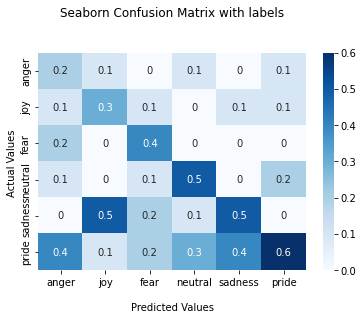

In [ ]:
import seaborn as sns

ax = sns.heatmap(np.array(cm) / 10, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["anger", "joy", "fear", "neutral", "sadness", "pride"])
ax.yaxis.set_ticklabels(["anger", "joy", "fear", "neutral", "sadness", "pride"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
! rm -rf /content/drive/MyDrive/CS490/models/only_critic_projection_wrong2022.04.14-20:33:46

In [ ]:
labels = np.array([0])
labels = np.repeat(labels, 1)
outputs = gan.generate(labels)

In [ ]:
x = outputs * 180

In [ ]:
outputs

array([[[ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ],
        [ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ],
        [ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ],
        ...,
        [ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ],
        [ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ],
        [ 0.00899361, -0.01141282,  0.01145669, ..., -0.00974358,
          0.01140397, -0.0115169 ]]], dtype=float32)

In [ ]:
x[0][-1].min()

-184.65588

In [ ]:
! rm -rf /content/drive/MyDrive/CS490/models/models_smoothened_data/WGAN2022.02.26-15:19:21

In [ ]:
for dir in os.listdir('/content/drive/MyDrive/CS490/models/models_smoothened_data'):
  # if dir[0:10] == 'WGAN_layer' and dir != 'WGAN2022.01.26-14:29:43':
  path = os.path.join('/content/drive/MyDrive/CS490/models/models_smoothened_data', dir)
  ! rm -rf $path

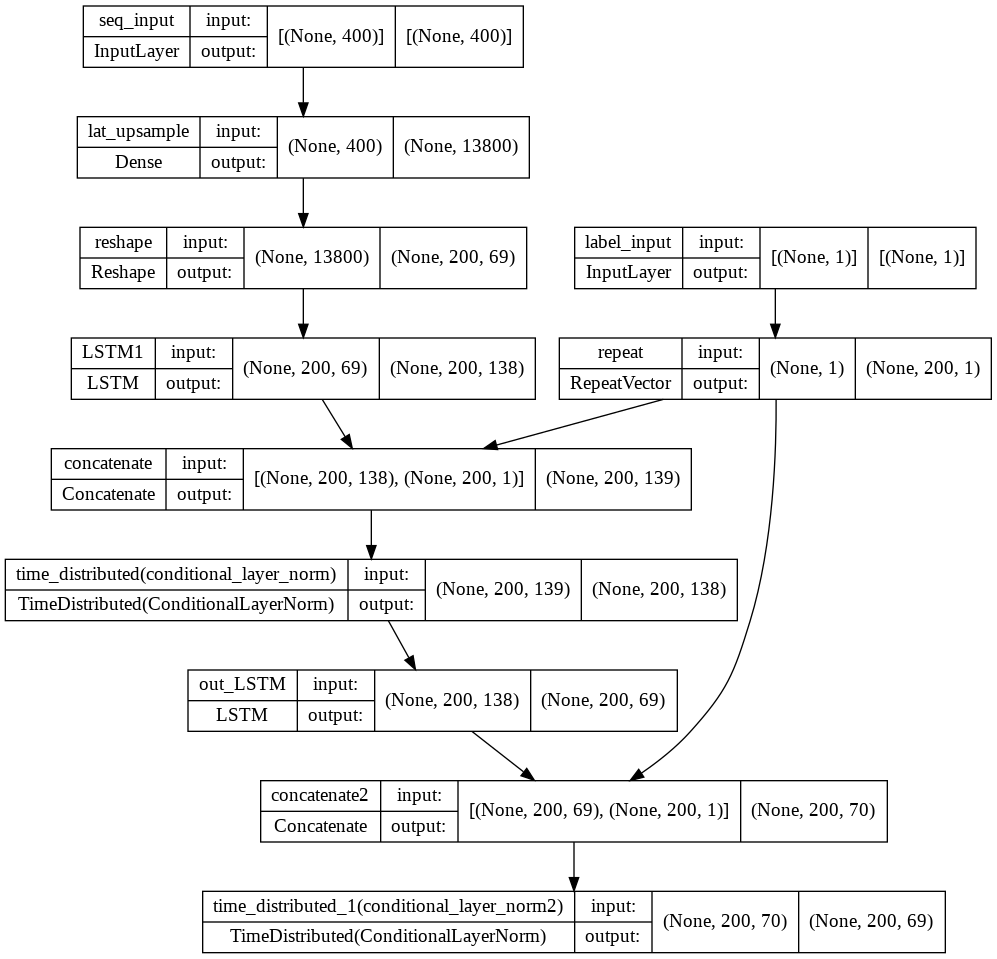

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(generator, show_shapes=True, show_layer_names=True)


In [ ]:
! rm -rf /content/drive/MyDrive/CS490/models/WGAN2022.01.27-14:10:21

In [ ]:
generator = define_generator(config)

In [ ]:
generator.summary()

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq_input (InputLayer)         [(None, 400)]        0           []                               
                                                                                                  
 lat_upsample (Dense)           (None, 27600)        11067600    ['seq_input[0][0]']              
                                                                                                  
 label_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 reshape_2 (Reshape)            (None, 200, 138)     0           ['lat_upsample[0][0]']           
                                                                                          

In [ ]:
import json
with open(os.path.join('/content/drive/MyDrive/CS490/models/one_class_2022.02.28-09:48:19/epoch_1', 'train_metrics.txt')) as file:
  tm = json.load(file)

In [ ]:
cm

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]]

<function matplotlib.pyplot.figure>

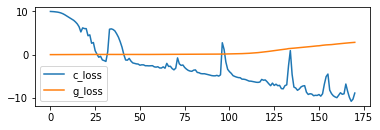

In [ ]:
Base_WGAN.plot_history(gan.train_metrics)

In [ ]:
import json
with open(os.path.join('/content/drive/MyDrive/CS490/models/WGAN_layer_norm2022.02.12-20:27:59/epoch_9', 'cm.txt')) as file:
  cm = json.load(file)

##Extras

In [6]:
# -*- coding: utf-8 -*-
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import copy

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf

main_dir = os.getcwd()
sys.path.append(os.path.join(main_dir, 'PyMO'))
sys.path.append(main_dir)
from pymo import parsers
from pymo import viz_tools
from pymo import preprocessing
from pymo import data as mocapdata
from tools import Tools

# representation can be '6d', 'rot' or 'eul'.
# the data is kept as tf Tensors if representation == '6d'
class Dataset(object):
  def __init__(
                self, 
                emotions,
                path,
                # path to drive will be constant, go to the folder named the emotion and load all the files in it.
                step_size = 20,
                frames = 200,
                validation = 0,
                representation = '6d',
                data = None
    ):
    assert validation >= 0 and validation < 1
    assert representation in ['6d', 'rot', 'eul'], "representation is {s}".format(s=representation)
    self.emotions = np.array(emotions).reshape((-1))
    self.step_size = step_size
    self.representation = representation
    self.onehotencoder = OneHotEncoder()
    self.onehotencoder.fit_transform(self.emotions.reshape(-1,1))
    # to encode: self.onehotencoder.transform([['joy']]).toarray().reshape((-1))
    # to decode: self.onehotencoder.inverse_transform([[1,0,0]])

    self.ordinalencoder = OrdinalEncoder()
    self.ordinalencoder.fit_transform(self.emotions.reshape((-1,1)))
    # to encode: self.ordinalencoder.transform(emotions.reshape((-1,1)))
    # to decode: self.ordinalencoder.inverse_transform([[2]])
    self.Y_vec = []
    self.X = []
    self.Y_ord = []
    self.validation = validation
    if self.validation > 0:
      self.Y_vec_val = []
      self.X_val = []
      self.Y_ord_val = []
    self.data = mocapdata.MocapData()
    self.feature_names = []  
    self.position_features = ['Hips_Xposition', 'Hips_Yposition', 'Hips_Zposition']
    self.rotation_features = ['Hips_Yrotation',
       'Hips_Xrotation', 'Hips_Zrotation', 'Chest_Yrotation',
       'Chest_Xrotation', 'Chest_Zrotation', 'Chest2_Yrotation',
       'Chest2_Xrotation', 'Chest2_Zrotation', 'Chest3_Yrotation',
       'Chest3_Xrotation', 'Chest3_Zrotation', 'Chest4_Yrotation',
       'Chest4_Xrotation', 'Chest4_Zrotation', 'Neck_Yrotation',
       'Neck_Xrotation', 'Neck_Zrotation', 'Head_Yrotation', 'Head_Xrotation',
       'Head_Zrotation', 'RightCollar_Yrotation', 'RightCollar_Xrotation',
       'RightCollar_Zrotation', 'RightShoulder_Yrotation',
       'RightShoulder_Xrotation', 'RightShoulder_Zrotation',
       'RightElbow_Yrotation', 'RightElbow_Xrotation', 'RightElbow_Zrotation',
       'RightWrist_Yrotation', 'RightWrist_Xrotation', 'RightWrist_Zrotation',
       'LeftCollar_Yrotation', 'LeftCollar_Xrotation', 'LeftCollar_Zrotation',
       'LeftShoulder_Yrotation', 'LeftShoulder_Xrotation',
       'LeftShoulder_Zrotation', 'LeftElbow_Yrotation', 'LeftElbow_Xrotation',
       'LeftElbow_Zrotation', 'LeftWrist_Yrotation', 'LeftWrist_Xrotation',
       'LeftWrist_Zrotation', 'RightHip_Yrotation', 'RightHip_Xrotation',
       'RightHip_Zrotation', 'RightKnee_Yrotation', 'RightKnee_Xrotation',
       'RightKnee_Zrotation', 'RightAnkle_Yrotation', 'RightAnkle_Xrotation',
       'RightAnkle_Zrotation', 'RightToe_Yrotation', 'RightToe_Xrotation',
       'RightToe_Zrotation', 'LeftHip_Yrotation', 'LeftHip_Xrotation',
       'LeftHip_Zrotation', 'LeftKnee_Yrotation', 'LeftKnee_Xrotation',
       'LeftKnee_Zrotation', 'LeftAnkle_Yrotation', 'LeftAnkle_Xrotation',
       'LeftAnkle_Zrotation', 'LeftToe_Yrotation', 'LeftToe_Xrotation',
       'LeftToe_Zrotation']
    self.path = path
    self.frames = frames
    if data == None:
      self.__load_data__()
    else:
      self.X, self.X_val, self.Y_ord, self.Y_ord_val, self.Y_vec, self.Y_vec_val = [data[key] for key in list(data.keys())[:6]]
      self.data, self.feature_names, self.n_features = [data[key] for key in list(data.keys())[6:9]]

  def __load_data__(self):
    parser = parsers.BVHParser()
    for emotion in self.emotions:
      data_path = self.path + '/' + str(emotion)
      file_names = os.listdir(data_path)
      print(emotion)
      one_hot_encoded_emotion = self.onehotencoder.transform([[emotion]]).toarray().reshape((-1))
      ordinal_encoded_emotion = self.ordinalencoder.transform([[emotion]]).reshape((-1))
      if self.validation > 0:
        val_split = int(np.ceil(len(file_names) * self.validation))
        val_files = file_names[-val_split:]
        file_names = file_names[:-val_split]
      for file_name in tqdm(file_names):
        file_path = data_path + '/' + file_name
        parser.parse(file_path)
        parser.data.values = parser.data.values[1:]  
        length = len(parser.data.values)
        no_of_parts = (length - self.frames) // self.step_size
        for i in range(no_of_parts):
          sample = parser.data.values[i * self.step_size:i * self.step_size + self.frames]
          arr = np.array(sample[self.rotation_features])
          self.X.append(arr)
          self.Y_vec.append(one_hot_encoded_emotion)
          self.Y_ord.append(ordinal_encoded_emotion)
      if self.validation > 0:
        for file_name in tqdm(val_files):
          file_path = data_path + '/' + file_name
          parser.parse(file_path)
          parser.data.values = parser.data.values[1:]  
          length = len(parser.data.values)
          no_of_parts = (length - self.frames) // self.step_size
          for i in range(no_of_parts):
            sample = parser.data.values[i * self.step_size:i * self.step_size + self.frames]
            arr = np.array(sample[self.rotation_features])
            self.X_val.append(arr)            
            self.Y_vec_val.append(one_hot_encoded_emotion)
            self.Y_ord_val.append(ordinal_encoded_emotion)

    self.data = parser.data
    self.feature_names = parser.data.values.columns   #.drop(self.position_features)
    if self.representation == '6d':
      self.X = Tools.rots_to_ort6d(Tools.euler_to_rots(np.array(self.X)))
    else:
      self.X = np.array(self.X)
    self.Y_vec = np.array(self.Y_vec)
    self.Y_ord = np.array(self.Y_ord)
    if self.validation > 0:
      if self.representation == '6d':
        self.X_val = Tools.rots_to_ort6d(Tools.euler_to_rots(np.array(self.X_val)))
      else:
        self.X_val = np.array(self.X_val)
      self.Y_vec_val = np.array(self.Y_vec_val)
      self.Y_ord_val = np.array(self.Y_ord_val)

    self.n_features = self.X.shape[2]

  @staticmethod
  def classes_dist(dataset):
    size = dataset.X.shape[0]
    index = [*range(size)]
    random.shuffle(index)
    X_shuffled = np.array([dataset.X[i] for i in index])
    Y_shuffled_ord = np.array([dataset.Y_ord[i] for i in index])
    Y_shuffled_vec = np.array([dataset.Y_vec[i] for i in index])
    dataset.X_samples = []
    dataset.Y_ord_samples = []
    dataset.Y_vec_samples = []
    for i in range(dataset.emotions.shape[0]):
      take = (Y_shuffled_ord == i).reshape(-1,)
      # return X_shuffled, take
      dataset.X_samples.append(X_shuffled[take])
      dataset.Y_ord_samples.append(Y_shuffled_ord[take])
      dataset.Y_vec_samples.append(Y_shuffled_vec[take])
    return [row.shape[0] for row in dataset.X_samples]

  @staticmethod
  def viz_dist(dataset):
    dist = dataset.classes_dist(dataset)
    x = np.arange(len(dist))
    y = dist
    LABELS = dataset.ordinalencoder.categories_[0][:8]
    plt.bar(x, y, align='center')
    plt.xticks(x, LABELS)
    return plt.figure
  

  @staticmethod
  def balance(dataset):
    size = dataset.X.shape[0]
    index = [*range(size)]
    random.shuffle(index)
    X_shuffled = np.array([dataset.X[i] for i in index])
    Y_shuffled_ord = np.array([dataset.Y_ord[i] for i in index])
    Y_shuffled_vec = np.array([dataset.Y_vec[i] for i in index])
    dataset.X_samples = []
    dataset.Y_ord_samples = []
    dataset.Y_vec_samples = []
    for i in range(dataset.emotions.shape[0]):
      take = (Y_shuffled_ord == i).reshape(-1,)
      dataset.X_samples.append(X_shuffled[take])
      dataset.Y_ord_samples.append(Y_shuffled_ord[take])
      dataset.Y_vec_samples.append(Y_shuffled_vec[take])
    min = np.min([row.shape[0] for row in dataset.X_samples])
    print('No. of samples in each class will be: ', min)
    dataset.X = np.concatenate([row[:min] for row in dataset.X_samples],axis=0)
    dataset.Y_ord = np.concatenate([row[:min] for row in dataset.Y_ord_samples],axis=0)
    dataset.Y_vec = np.concatenate([row[:min] for row in dataset.Y_vec_samples],axis=0)
    
  def get_size(self):
      return self.X.shape[0]

  # tracks x frames x joints x ?
  def convert_representation(self, X, rep='6d'):
    assert rep in ['6d', 'rot', 'eul'], "representation is {s}".format(s=repr)
    if self.representation == '6d':
      if rep == '6d':
        X = X.numpy()
      elif rep == 'rot':
        X = Tools.ort6d_to_rots(X)
    elif self.representation == 'rot':
      if rep == '6d':
        X = Tools.rots_to_ort6d(X).numpy()
      elif rep == 'rot':
        pass
    elif self.representation == 'eul':
      if rep == '6d':
        X = Tools.rots_to_ort6d(Tools.euler_to_rots(X)).numpy()
      elif rep == 'rot':
        X = Tools.euler_to_rots(X)
      elif rep == 'eul':
        pass
    return X.reshape((X.shape[0], X.shape[1], -1))

  # For the simple LSTM model called Classifier
  def train_test_split(self, test_size = 0.33, ord = False, rep='6d'):
    size = self.X.shape[0]
    index = [*range(size)]
    random.shuffle(index)
    X_shuffled = np.array([self.X[i] for i in index])
    if ord:
      Y_shuffled = np.array([self.Y_ord[i] for i in index])
    else:
      Y_shuffled = np.array([self.Y_vec[i] for i in index])
    split = size - int(size * test_size)
    X = self.convert_representation(X_shuffled, rep)
    return  X[0:split], Y_shuffled[0:split], X[split:], Y_shuffled[split:]

  def generate_real_samples(self, n_samples, val=False, rep='6d'):
    if val:
      seq, labels = self.X_val, self.Y_ord_val
    else:
      seq, labels = self.X, self.Y_ord
    r = np.random.randint(0, seq.shape[0], n_samples)
    labels = labels[r]
    X = seq[r]
    X = self.convert_representation(X, rep)
    y = -np.ones((n_samples, 1))
    return [tf.convert_to_tensor(labels), tf.convert_to_tensor(X, dtype=tf.float32)], tf.convert_to_tensor(y)

  # not necessary anymore?
  def generate_fake_samples(self, n_samples, val=False, rep='6d'):
    if val:
      seq, labels = self.X_val, self.Y_ord_val
    else:
      seq, labels = self.X, self.Y_ord
    r = np.random.randint(0, seq.shape[0], n_samples)
    labels_tmp = labels[r].reshape((-1,))
    X = seq[r]
    X = self.convert_representation(X, rep)
    l = np.random.randint(1, self.emotions.shape[0], n_samples) 
    # randomly change to class labels to another
    labels_tmp = (labels_tmp + l) % self.emotions.shape[0]
    y = np.ones((n_samples, 1))
    return [tf.convert_to_tensor(labels_tmp.reshape((-1,1))), tf.convert_to_tensor(X, dtype=tf.float32)], tf.convert_to_tensor(y)

  # given euler values (shape: tracks x frames x features)
  # return list of mocap tracks with position.
  def eul_to_pos(self, rotation_data):
    pos_values = np.zeros((rotation_data.shape[1], 3))
    full_values = np.array([np.concatenate((pos_values,sample), axis=1) for sample in rotation_data])
    values = [pd.DataFrame(data=sample, columns=self.feature_names) for sample in full_values]
    mocap = np.repeat([self.data.clone()], rotation_data.shape[0])
    for i in range(rotation_data.shape[0]):
      mocap[i].values = values[i]
    parametrizer = preprocessing.MocapParameterizer(param_type='position')
    position_transformed = parametrizer.transform(mocap)
    return position_transformed

  # given rotation matrices (shape: tracks x frames x joints x 3 x 3)
  # return list of mocap tracks with position.
  def rots_to_pos(self, rots):
    rots_tracks = Tools.rots_to_dict(rots, self)
    X = rots_tracks.copy()
    data = self.data
    '''Converts joints rotations in Euler angles to joint positions'''
    Q = []
    # track:  frames x no_of_joints x (3 x 3)
    for track in X:
      tmp = track.copy()
      channels = []
      titles = []
      # Create a new DataFrame to store the exponential map rep
      pos_df = pd.DataFrame(index=data.values.index[:self.frames])
      tree_data = {}

      for (joint_id, joint) in enumerate(data.traverse()):
        parent = data.skeleton[joint]['parent']
        tree_data[joint]=[
                              [], # to store the rotation matrix
                              []  # to store the calculated position
                            ] 

        pos_values = [[0,0,0] for f in range(self.frames)]
        if joint not in tmp.keys():
          tmp[joint] = np.array([[[1., 0., 0.],
                                      [0., 1., 0.],
                                      [0., 0., 1.]] for i in range(self.frames)])
        if joint == data.root_name:
          tree_data[joint][0] = tmp[joint]
          tree_data[joint][1] = pos_values
        else:
          # for every frame i, multiply this joint's rotmat to the rotmat of its parent
          tree_data[joint][0] = np.asarray([np.matmul(tmp[joint][i], tree_data[parent][0][i]) 
                                            for i in range(len(tree_data[parent][0]))])

          # add the position channel to the offset and store it in k, for every frame i
          k = np.asarray([data.skeleton[joint]['offsets'] for i in range(len(tree_data[parent][0]))])

          # multiply k to the rotmat of the parent for every frame i
          q = np.asarray([np.matmul(k[i], tree_data[parent][0][i]) 
                          for i in range(len(tree_data[parent][0]))])

          # add q to the position of the parent, for every frame i
          tree_data[joint][1] = np.asarray([np.add(q[i], tree_data[parent][1][i])
                                            for i in range(len(tree_data[parent][1]))])
          
        # Create the corresponding columns in the new DataFrame
        pos_df['%s_Xposition'%joint] = pd.Series(data=[e[0] for e in tree_data[joint][1]], index=pos_df.index)
        pos_df['%s_Yposition'%joint] = pd.Series(data=[e[1] for e in tree_data[joint][1]], index=pos_df.index)
        pos_df['%s_Zposition'%joint] = pd.Series(data=[e[2] for e in tree_data[joint][1]], index=pos_df.index)

    new_track = data.clone()
    new_track.values = pos_df
    Q.append(new_track)
    return Q

  @staticmethod
  def stickfigure(mocap_track, title='', step=20, cols=5, data=None, joints=None, draw_names=False, ax=None, figsize=(8,8)):
    n = mocap_track.values.shape[0] // step
    
    fig, axs = plt.subplots(ncols=cols, nrows=n // cols , figsize=figsize, constrained_layout=True)
    for row in range(n // cols):
      for col in range(cols):    
        if joints is None:
            joints_to_draw = mocap_track.skeleton.keys()
        else:
            joints_to_draw = joints    
        if data is None:
            df = mocap_track.values
        else:
            df = data  
        frame = (row * cols + col) * step
        for joint in joints_to_draw:
            axs[row, col].scatter(x=df['%s_Xposition'%joint][frame], 
                        y=df['%s_Yposition'%joint][frame],  
                        alpha=0.6, c='b', marker='o')
            parent_x = df['%s_Xposition'%joint][frame]
            parent_y = df['%s_Yposition'%joint][frame]        
            children_to_draw = [c for c in mocap_track.skeleton[joint]['children'] if c in joints_to_draw]        
            for c in children_to_draw:
                child_x = df['%s_Xposition'%c][frame]
                child_y = df['%s_Yposition'%c][frame]
                axs[row, col].plot([parent_x, child_x], [parent_y, child_y], 'k-', lw=2)            
            if draw_names:
                axs[row, col].annotate(joint, 
                        (df['%s_Xposition'%joint][frame] + 0.1, 
                          df['%s_Yposition'%joint][frame] + 0.1))
            axs[row, col].axis('off')
    fig.suptitle(title)
    return fig

  # Giving an error
  @staticmethod
  def stickfigure3d(mocap_track, step=1, cols=2, data=None, joints=None, draw_names=False, ax=None, figsize=(8,8)):
    from mpl_toolkits.mplot3d import Axes3D
    n = 100 // step
    fig, axs = plt.subplots(ncols=cols, nrows=n // cols , figsize=figsize, constrained_layout=True)
    for row in range(n // cols):
      for col in range(cols):    
        if joints is None:
            joints_to_draw = mocap_track.skeleton.keys()
        else:
            joints_to_draw = joints  
        if data is None:
            df = mocap_track.values
        else:
            df = data     
        frame = (row * cols + col) * step
        for joint in joints_to_draw:
            parent_x = df['%s_Xposition'%joint][frame]
            parent_y = df['%s_Zposition'%joint][frame]
            parent_z = df['%s_Yposition'%joint][frame]
            # ^ In mocaps, Y is the up-right axis
            print(parent_x, parent_y, parent_z)
            axs[row, col].scatter(xs=parent_x, 
                        ys=parent_y,  
                        zs=parent_z,  
                        alpha=0.6, c='b', marker='o')        
            children_to_draw = [c for c in mocap_track.skeleton[joint]['children'] if c in joints_to_draw]    
            for c in children_to_draw:
                child_x = df['%s_Xposition'%c][frame]
                child_y = df['%s_Zposition'%c][frame]
                child_z = df['%s_Yposition'%c][frame]
                # ^ In mocaps, Y is the up-right axis

                axs[row, col].plot([parent_x, child_x], [parent_y, child_y], [parent_z, child_z], 'k-', lw=2, c='black')       
            if draw_names:
                axs[row, col].text(x=parent_x + 0.1, 
                        y=parent_y + 0.1,
                        z=parent_z + 0.1,
                        s=joint,
                        color='rgba(0,0,0,0.9)')
            axs[row, col].axis('off')
    return ax


In [ ]:
def a(b):
  if b == 1:
    pass
  print('yo')

In [ ]:
a(1)

yo
